# Take-Home Exam 4: kNN

*In this take-home exam, you are going to work with k-nearest neighbors algorithm and observe how it performs with different hyperparameter settings.*

**Submission Instructions**

---
Copy this assignment to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th4`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, you may send an email to the TAs and LAs.

---

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

## Measuring the Distance

The core of the kNN algorithm depends on the measuring the distance, i.e. similarity, between test and training observations. Here, the applied distance function plays a vital role on the performance of the model. In this section, you are going to experiment with various distance functions and observe their effects on the models.

To this end, you are going to work with `data.csv`, which is attached in the assignment folder. The dataset contains two continuous features and a class label of three different values.

In [0]:
filename = "data.csv"
df = pd.read_csv(join(path_prefix, filename))
df.head()

,x,y,label
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


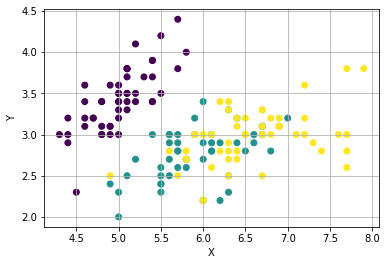

In [0]:
plt.scatter(df["x"], df["y"], c=df["label"])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

### Q1: Distance Functions

Up to this point, we utilized euclidiean distance between observations to obtain the similarities. In this task, you are going to explore different distance functions and implement them from scratch. 

---

#### Euclidean Distance

Represents the root of the sum of the square of differences between the opposite values in vectors.

$\sqrt{\sum_{i=0}^N \, |x_i - y_i|^2}$

#### Manhattan Distance

Also known as city block distance. Represents the sum of the absolute differences between the opposite values in vectors. 

$\sum_{i=0}^N \, |x_i - y_i|$

#### Chebyshev Distance

Also known as maximum value distance. The distance between two vectors is the greatest of their difference along any coordinate dimension.

$max_i \; |x_i - y_i|$

---

<img height="200" width="600" src="https://iq.opengenus.org/content/images/2018/12/distance.jpg"/>




Below, you have two vectors, `x` and `y`, of the same size. In this task, you need to write the distance functions described above from scratch as regular Python functions. Each function should take two parameters, corresponding to the vectors, and return the distance between them. 

- *Calculate the distance between `x` and `y` with each distance function, then **print** the results*.

*p.s You may deploy the built-in functions from Scipy to validate your results.*

In [0]:
# built-in distance functions
from scipy.spatial import distance

N = 5
np.random.seed(0)
x = np.random.randn(N)
y = np.random.randn(N)

In [0]:
# your code
import math

def eucladianDist(x, y):
  result = 0
  for i in range(len(x)):
    result += (x[i]-y[i])**2
  
  result = math.sqrt(result)

  return result

def manhattanDist(x, y):
  result = 0
  for i in range(len(x)):
    result += abs(x[i]-y[i])
  
  return result

def chebyshevDist(x, y):
  result = 0
  for i in range(len(x)):
    if (abs(x[i]-y[i]) > result):
      result = abs(x[i]-y[i])
  
  return result

manuelEuc = eucladianDist(x,y)
manuelManh = manhattanDist(x, y)
manuelCheb = chebyshevDist(x, y)
print("built-in is: ", distance.euclidean(x,y))
print("manuel is: ", manuelEuc)

print("built-in is: ", distance.cityblock(x,y))
print("manuel is: ", manuelManh)

print("built-in is: ", distance.chebyshev(x,y))
print("manuel is: ", manuelCheb)

built-in is:  4.0880341417038
manuel is:  4.0880341417038
built-in is:  8.222428166612488
manuel is:  8.222428166612488
built-in is:  2.741330225844075
manuel is:  2.741330225844075


### Q2: Classification Boundries

In this section, you are going to observe the effect of distance functions on the classification boundries. Below, you have a function named `visualize_model` which takes three parameters:  

- `model` -> a model you generated
- `ax` -> an axes object to plot the classification boundries of the given model
- `title` -> the title of the given `ax` object

The function **trains the model** with the provided data in Q1 and then **displays the resulting classification boundries**.

- *In this question, you are going to experiment with the distance functions above. **Generate** (do not train it) a kNN model, `with K set to 1`, for each distance function described in Q1 and then plot a **1x3 layout (one row, three columns)**, in which the classifiction boundries of a particular kNN model is displayed in the columns. Use the `title` parameter to distinguish plots of each distance function.*

- *Once you obtain the figure, comment on the resulting classification boundries. Discuss and compare how a particular distance function affects the classification boundries.*

In [0]:
from matplotlib.colors import ListedColormap
from ipywidgets import interact

def visualize_model(model, ax, title):
  step = 0.05

  cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
  cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

  data = df[["x", "y"]].values
  labels = df["label"].values

  model.fit(data, labels)

  x_min = data[:, 0].min() - 1
  x_max = data[:, 0].max() + 1
  y_min = data[:, 1].min() - 1
  y_max = data[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  y_pred = model.predict(np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])).reshape(xx.shape)

  ax.pcolormesh(xx, yy, y_pred, cmap=cmap_light)
  ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_title(title)

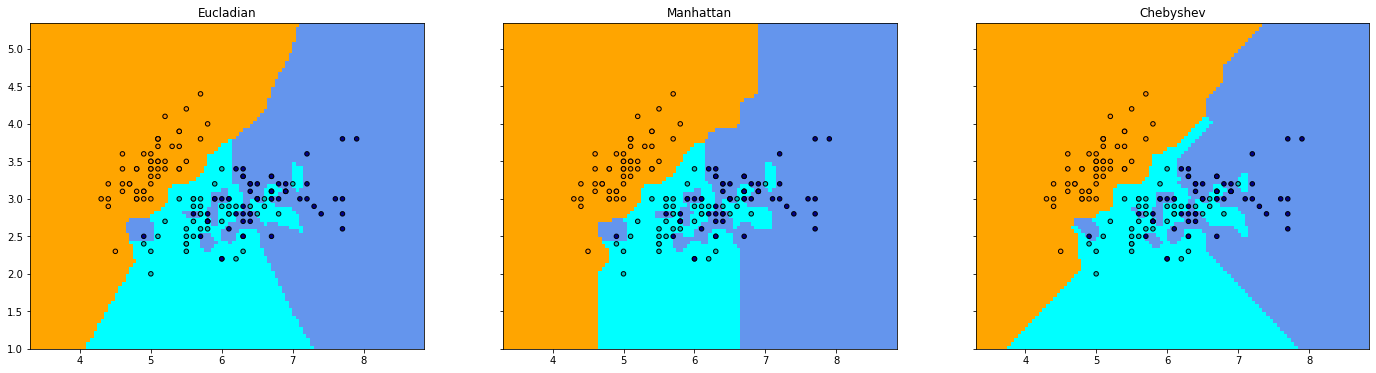

In [0]:
# your code
from sklearn.neighbors import KNeighborsClassifier
model_euc = KNeighborsClassifier(1, metric="euclidean")
model_manh = KNeighborsClassifier(1, metric="cityblock")
model_cheb = KNeighborsClassifier(1, metric="chebyshev")

fig, axs = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

visualize_model(model_euc, axs[0], "Eucladian")
visualize_model(model_manh, axs[1], "Manhattan")
visualize_model(model_cheb, axs[2], "Chebyshev")

<font color="blue">[Double Click to Insert Your Comments]</font>

After looking at the classification boundries, we see that they don't have the same boundaries. Manhattan have more horizontal lines, Chebyshev has more linear, while Eucladian differs. This difference is caused because of how the distance is calculated in particular measurement technique. It is important to choose the correct distance function to have more accurate results.

## Feature Scaling

In this section, you are going to observe the effect of feature scaling on the performance of your models. To this end, you are going to use the `wine quality` dataset in which your goal is to predict the quality of the wines that are stored in the `target` column.


### Q1: Feature Standardization

In the raw dataset, some of the features are obtained from differing ranges due to their definitions. This difference among the variables/features may cause a problem for the distance functions. In order to deal with this problem, we discussed scaling techniques in the previous recitations. In this task, you are going to compare your models with raw and standardized features utilizing different distance functions.

1. First of all, split your data into two folds, *train* and *test* (80% training, 20% test) with sklearn's *train_test_split* function as we did in the recitations. Here, it's cruical that you call this function with **random_state=0**, so that you will obtain the same partitioning in each run.

2. Once you perform the train and test splitting, create a kNN model with **K set to 5** for each distance function we discussed in the previous section. Train your model with the traing data and obtain the accuracy score.

3. In the recitation, we performed standardization manually. In other words, we calculated the mean and std from the data and performed the subtraction and division by hand. Here, you are going to deploy a built-in function from sklearn, [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

4. After you standardize the features, you basically need to repeat step 2 with the scaled features: *create a kNN model with **K set to 5** for each distance function we discussed in the previous section. Train your model with the traing data and obtain the accuracy score.*

*Store the accuracy score of each model in an appropriate data structure of your choice and **print out the results**.*



In [0]:
from sklearn import datasets

wine = datasets.load_wine()
cols = wine.feature_names + ["target"]
df_wine = pd.DataFrame(np.hstack([wine.data, wine.target.reshape(-1,1)]), columns=cols)
df_wine["target"] = df_wine["target"].astype(int)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [0]:
# your code
from sklearn.model_selection import train_test_split
X = df_wine.drop("target", axis=1)
y = df_wine["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

knn = KNeighborsClassifier(5, metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Raw Eucladian accuracy is: ", accuracy)

knn = KNeighborsClassifier(5, metric="cityblock")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Raw Manhattan accuracy is: ", accuracy)

knn = KNeighborsClassifier(5, metric="chebyshev")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Raw Chebyshev accuracy is: ",accuracy)

Scaler = StandardScaler()
Scaler.fit(df_wine.iloc[:,0:-1] )
new_wine_df = Scaler.transform(df_wine.iloc[:,0:-1])

x_Train, x_Test, y_Train, y_Test = train_test_split(new_wine_df,df_wine['target'], test_size=0.2, random_state=0)

KNN = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
KNN.fit(x_Train,y_Train)
pred = KNN.predict(x_Test)
accuracy = accuracy_score(y_Test, pred)
print("Standardized Eucladian accuracy is: ", accuracy)

KNN = KNeighborsClassifier(n_neighbors = 5, metric="cityblock")
KNN.fit(x_Train,y_Train)
pred = KNN.predict(x_Test)
manhScore = accuracy_score(y_Test, pred)
print("Standardized Manhattan accuracy is: ", accuracy)

KNN = KNeighborsClassifier(n_neighbors = 5, metric="chebyshev")
KNN.fit(x_Train,y_Train)
pred = KNN.predict(x_Test)
accuracy = accuracy_score(y_Test, pred)
print("Standardized Chebyshev accuracy is: ",accuracy)

Raw Eucladian accuracy is:  0.8055555555555556
Raw Manhattan accuracy is:  0.8333333333333334
Raw Chebyshev accuracy is:  0.7222222222222222
Standardized Eucladian accuracy is:  0.9722222222222222
Standardized Manhattan accuracy is:  0.9722222222222222
Standardized Chebyshev accuracy is:  0.9166666666666666


### Q2: Tabular Results and Interpretation

Now, you are going to present your results in a tabular format. 

- Create a markdown table in the cell below, where you are going to **display the accuracy score** of the models with distinct distance functions on raw and standardized features.

An exemplary table can be found below.

<img height="100" width="300" src="https://i.ibb.co/1RnHG36/tr.png"/>

Once you obtain the table, comment on the results. Discuss the effect of standardization on the accuracy scores.

<font color="blue">[Double Click to Insert Your Table and Comments]</font>

| Distance Function        | Raw Features           | Standardized Features  |
| ------------- |:-------------:| -----:|
| Chebyshev     | 0.7222222222222222 | 0.9166666666666666 |
| Euclidean      | 0.8055555555555556      |   0.9722222222222222 |
| Manhattan | 0.8333333333333334      |    0.9722222222222222 |

We see that there is a great difference between standardized and raw versions of the data. Accuracy score rises significantly when we standardize the data from raw form.